#**Preprocesamiento de la base de datos DDFO**

El preprocesamiento consta de los siguientes pasos:



1.   Eliminar outliers
2.   Imputar datos NA.
3.   Caracterizar la base de datos.
4.   Normalizar datos.
5.   Separar en datos de entrenamiento y de prueba.
6.   Preparar datos para realizar aprendizaje supervizado.

Debido a que esta base de datos no contiene valores perdidos ni datos anomalos, se empieza este preprocesamiento desde el paso número 3, osea que a continuación se procede a caracterizar la base de datos.



In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/codigos/data/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/codigos/data


In [3]:
ls

Daily_Demand_Forecasting_Orders.csv   renamedData.csv
Daily_Demand_Forecasting_Orders.xlsx


In [4]:
import pandas as pd
df = pd.read_csv('renamedData.csv', header=0)
df.head()

Week_of_the_month  ...  Target_(Total_orders)
0                  1  ...                539.577
1                  1  ...                224.675
2                  1  ...                129.412
3                  2  ...                317.120
4                  2  ...                210.517

[5 rows x 13 columns]

#**Caracterización de la base de datos DDFO**

El siguiente archivo contiene los códigos y conclusiones necesarias para caracterizar la base de datos DDFO.

Las caracteristicas a analizar son las siguientes:

1.   **Variables endógenas o exógenas**
2.   **Variables univariantes o multivariantes**
3.   **Serie continua o no continua**
4.   **Serie estacionario o no estacionario**
5.   **Serie desestructurada o estructurada**
6.   **Complejidad**

##1 Variables endógenas o exógenas

Para determinar estas variables, el investigador debe analizar y decidir cuales y cuantas existen. A continuación se expone la justificación y las elecciones:

Se considera que la varible endogena corresponde a la variable objetivo "Target_(Total_orders)".

Todas las demás corresponden a varibles exogenas. De esta manera, se tiene 1 variable endogena y 12 variables exogenas.

##2 Variables univariantes o multivariantes

Para determinar estas variables, el investigador debe analizar y decidir cuales y cuantas existen. A continuación se expone la justificación y las elecciones:

El problema claramente es multivariante, pero para ser más precisos, se utilizarán 12 variables de entrada y una variable de salida. De esta manera, es problema es multivariable en las entradas y univariante en la salida.

##3 Series con muestreo regular o irregular

Para determinar esta caracteristica, el investigador debe analizar y decidir si la serie es continua o no. A continuación se expone la justificación y la elección:

Se considera que la serie claramente tiene un muestre regular, ya que no existen mediciones faltantes.

##4 Serie estacionario o no estacionario

https://machinelearningmastery.com/time-series-data-stationary-python/

https://towardsdatascience.com/how-to-check-if-our-time-series-is-stationary-or-not-and-why-eb25b1c0ac52

https://medium.com/@cmukesh8688/why-is-augmented-dickey-fuller-test-adf-test-so-important-in-time-series-analysis-6fc97c6be2f0

Para comprobar la estacionariedad de este problema, se realiza la prueba estadistica "Augmented Dickey-Fuller Test (ADF)". El nivel de significancia usado sera de 1%. De esta manera, se contabiliza cuantas series son estacionarias y cuantas no, de tal manera que si si la mayoria de las series son estacionaria, el problema se considera estacionario, analogo para el caso de no estacionariedad.

In [27]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

def aplicate_adf(data):
  #se crea un arreglo con 3 valores inicializados en 0
  # la posicion 0 correspondera a la cantidad de series estacionarias
  # la posicion 1 correspondera a la cantidad de series no estacionarias
  # la posicion 2 corresponde a la cantidad total de series
  resumen = [0,0,0]

  #Se va a iterar para cada variable
  for columnName, columnData in data.iteritems():
    #print('Colunm Name : ', columnName)
    data = columnData.values
    result = adfuller(data)
    if result[1] <= 0.01:
      #print("Rechazar hipotesis nula, datos estacionarios")
      resumen[0] = resumen[0] + 1
      resumen[2] = resumen[2] + 1
    else:
      #print("Aceptar hipotesis nula, datos no estacionarios")
      resumen[1] = resumen[1] + 1
      resumen[2] = resumen[2] + 1
  return resumen


res = aplicate_adf(df)

print("La cantidad de estacionarios es: ", res[0])
print("La cantidad de no estacionarios es: ", res[1])
print("La cantidad de series es: ", res[2])

La cantidad de estacionarios es:  7
La cantidad de no estacionarios es:  6
La cantidad de series es:  13


La cantidad de series no estacionarias es menor a la cantidad de series estacionarias, por lo tanto, este problema se caracteriza como estacionario.

##5 Serie desestructurada o estructurada

Esta caracterista se relaciona con la caracteristica anterior. Si el problema es estacionario, significa que las series de tiempo no contienen tendencias o patrones estacionales. De esta manera, al definir este problema como estacionario tambien se define como desestructurado.

##6 Complejidad

Se utilizan los algoritmos de los siguientes links:

https://github.com/LRydin/MFDFA

https://mfdfa.readthedocs.io/en/latest/1dLevy.html

http://reylab.bidmc.harvard.edu/tutorial/DFA/node5.html



Primero se realizan pruebas por separado a algunas series de tiempo.

In [6]:
dataToWork = df.iloc[:,:]
#sample = dataToWork.loc[(dataToWork['chunkID'] == 1) & (dataToWork['position_within_chunk'] == posicion)]
sample = dataToWork.iloc[:,1]
aux = sample.values
print(sample)
print(type(sample))
print(aux)
print(type(aux))

0     4
1     5
2     6
3     2
4     3
5     4
6     5
7     6
8     2
9     3
10    4
11    5
12    6
13    2
14    3
15    4
16    5
17    6
18    2
19    3
20    4
21    5
22    6
23    2
24    3
25    4
26    5
27    6
28    2
29    3
30    4
31    5
32    3
33    4
34    5
35    6
36    2
37    3
38    4
39    6
40    2
41    3
42    4
43    5
44    6
45    2
46    3
47    4
48    5
49    6
50    2
51    3
52    4
53    5
54    6
55    2
56    3
57    4
58    5
59    6
Name: Day_of_the_week, dtype: int64
<class 'pandas.core.series.Series'>
[4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 3 4 5 6 2
 3 4 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6]
<class 'numpy.ndarray'>


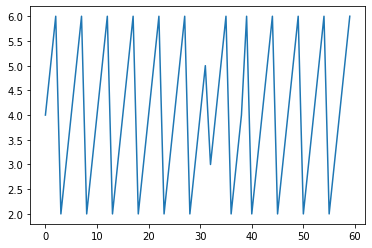

In [7]:
from matplotlib import pyplot as plt

plt.plot(aux)
plt.show()

In [8]:
pip install MFDFA

In [15]:
# Imports
from MFDFA import MFDFA
from MFDFA import fgn
import numpy as np

# Select a band of lags, which usually ranges from
# very small segments of data, to very long ones, as
lag = np.array([1,2,3,4,5,6,7,8,9,10,12,14,18,20,25,30,35,40])
print(lag)
# Notice these must be ints, since these will segment
# the data into chucks of lag size

# Select the power q
q = 2

# The order of the polynomial fitting
order = 2

# Obtain the (MF)DFA as
lag, dfa = MFDFA(aux, lag = lag, q = q, order = order)

[ 1  2  3  4  5  6  7  8  9 10 12 14 18 20 25 30 35 40]


[0.51901252 0.39351954 0.30817994 0.28363591 0.27474686]


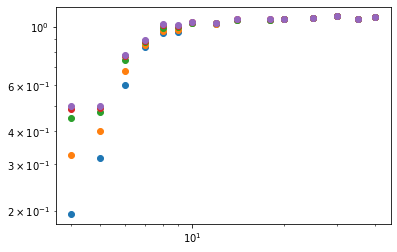

In [28]:
# To uncover the Hurst index, lets get some log-log plots
plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=2')



# And now we need to fit the line to find the slope. We will
# fit the first points, since the results are more accurate
# there. Don't forget that if you are seeing in log-log
# scales, you need to fit the logs of the results
slope, intercept = np.polyfit(np.log(lag[:]), np.log(dfa[:]),1)

print(slope)

In [26]:
# Select a band of lags, which are ints
lag = np.array([1,2,3,4,5,6,7,8,9,10,12,14,18,20,25,30,35,40])

print(lag.shape)

# Select a list of powers q
#q_list = [2, 5, 10]
q_list = [1, 2, 5, 8, 10]


# The order of the polynomial fitting
order = 2

# Obtain the (MF)DFA as
lag, dfa = MFDFA(aux, lag = lag, q = q_list, order = order)

(18,)


<class 'numpy.ndarray'>
(15, 3)
0.33


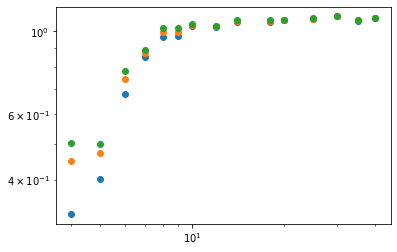

In [25]:
# To uncover the Hurst index, lets get some log-log plots
plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=[2, 5, 10]')

print(type(dfa))
print(dfa.shape)

# And now we need to fit the line to find the slope. We will
# fit the first points, since the results are more accurate
# there. Don't forget that if you are seeing in log-log
# scales, you need to fit the logs of the results
slope, intercept = np.polyfit(np.log(lag[:]), np.log(dfa[:]),1)

mediaAux = round(np.mean(slope),2)
print(mediaAux)

Se procede a calcular la complejidad de todas las series de tiempo y a obtener un promedio de complejidad para el problema.

In [30]:
def aplicate_mfdfa(data):
  lag = np.array([1,2,3,4,5,6,7,8,9,10,12,14,18,20,25,30,35,40])
  q_list = [1, 2, 5, 8, 10]
  # The order of the polynomial fitting
  order = 2
  #se crea un arreglo con 2 valores inicializados en 0
  # la posicion 0 correspondera a la suma de complejidades de la series
  # la posicion 1 correspondera a la cantidad de series analizadas
  resumen = [0,0]

  #Se va a iterar para cada variable
  for columnName, columnData in data.iteritems():
    data = columnData.values
    # Obtain the (MF)DFA as
    lag, dfa = MFDFA(data, lag = lag, q = q_list, order = order)
    # And now we need to fit the line to find the slope. We will
    # fit the first points, since the results are more accurate
    # there. Don't forget that if you are seeing in log-log
    # scales, you need to fit the logs of the results
    H = np.polyfit(np.log(lag[:]), np.log(dfa[:]),1)[0]
    mediaAux = round(np.mean(H),2)
    resumen[0] = resumen[0] + mediaAux
    resumen[1] = resumen[1] + 1

  return resumen


res = aplicate_mfdfa(df)

Hfinal = res[0]/res[1]

print("La complejidad fractal del problema en promedio es: ", Hfinal)

La complejidad fractal del problema en promedio es:  0.6707692307692307


Sabemos que: 

"El exponente de escala generalizado lejos del nivel desordenado 0.5 representa una gran capacidad de memorización del sistema, es decir, los datos observados se encuentran en un nivel bajo de complejidad con una alta persistencia o auto similitud a largo plazo." (Paper de complejidades series de tiempo)

Por lo tanto, la complejidad de las series de tiempo de este problema es media.